C:\Users\user\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')
C:\Users\user\Anaconda3\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


청주 : 2
가게 : 2
사인 : 2
동네 : 1
책방 : 1
발상 : 1
시작 : 1
이벤 : 1
때문 : 1
근처 : 1
구경 : 1
오자 : 1
마음 : 1
진행 : 1
오늘 : 1
오후 : 1
충북 : 1
질문 : 1
정도 : 1
예정 : 1
계시 : 1
이상 : 1
연쇄 : 1
김영 : 1
가게 : 4
책방 : 4
사인 : 4
청주 : 2
동네 : 2
발상 : 2
시작 : 2
이벤 : 2
때문 : 2
근처 : 2
구경 : 2
오자 : 2
마음 : 2
진행 : 2
오늘 : 2
오후 : 2
정도 : 2
예정 : 2
계시 : 2
이상 : 2
연쇄 : 2
김영 : 2
광주 : 2
광역시 : 2
충북 : 1
질문 : 1
가게 : 4
책방 : 4
사인 : 4
청주 : 2
동네 : 2
발상 : 2
시작 : 2
이벤 : 2
때문 : 2
근처 : 2
구경 : 2
오자 : 2
마음 : 2
진행 : 2
오늘 : 2
오후 : 2
정도 : 2
예정 : 2
계시 : 2
이상 : 2
연쇄 : 2
김영 : 2
광주 : 2
광역시 : 2
충북 : 1
질문 : 1
가을 : 1
개나리 : 1
언덕 : 1
정말 : 1
감사 : 1
가게 : 4
책방 : 4
사인 : 4
오늘 : 3
예정 : 3
청주 : 2
동네 : 2
발상 : 2
시작 : 2
이벤 : 2
때문 : 2
근처 : 2
구경 : 2
오자 : 2
마음 : 2
진행 : 2
오후 : 2
정도 : 2
계시 : 2
이상 : 2
연쇄 : 2
김영 : 2
광주 : 2
광역시 : 2
충북 : 1
질문 : 1
가을 : 1
개나리 : 1
언덕 : 1
정말 : 1
감사 : 1
뉴욕 : 1
유엔 : 1
총회 : 1
여파 : 1
맨해튼 : 1
교통 : 1
거의 : 1
지옥 : 1
가게 : 6
사인 : 6
책방 : 5
오늘 : 4
예정 : 4
동네 : 3
발상 : 3
시작 : 3
이벤 : 3
때문 : 3
근처 : 3
구경 : 3
오자 : 3
마음 : 3
진행 : 3
오후 : 3
정도 : 3
계시 : 3
이상 : 3
연쇄 : 3
김영 : 3
청주 : 2


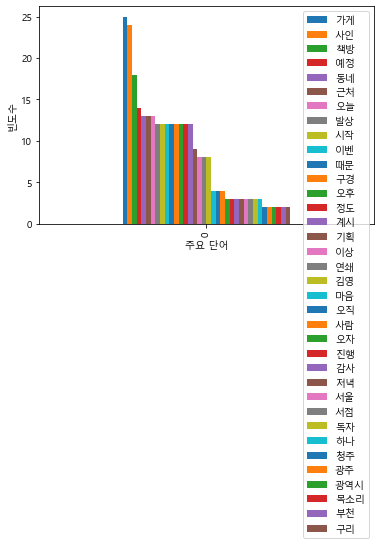

     빈도수
가게    25
감사     3
계시    12
광역시    2
광주     2
구경    12
구리     2
근처    13
기획     9
김영     8
독자     3
동네    13
때문    12
마음     4
목소리    2
발상    12
부천     2
사람     4
사인    24
서울     3
서점     3
시작    12
연쇄     8
예정    14
오늘    13
오자     3
오직     4
오후    12
이벤    12
이상     8
저녁     3
정도    12
진행     3
책방    18
청주     2
하나     3


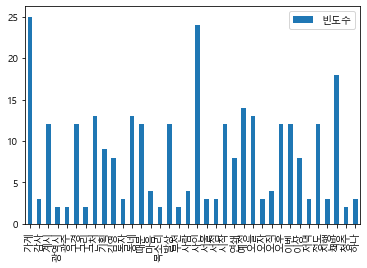

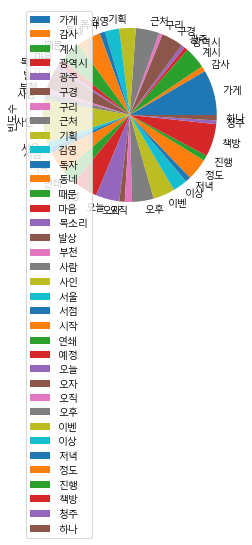

In [2]:
import json 
import re 
import pandas as pd 
from konlpy.tag import Twitter
from collections  import Counter 
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc
import pytagcloud
import webbrowser  
openFileName = 'crtest.json' 
cloudImagePath = openFileName + '.jpg'  
rfile = open(openFileName, 'r', encoding='utf-8').read()
jsonData = json.loads(rfile) 
message = ''
for item in jsonData: 
    if 'message' in item.keys():
        message = message + re.sub(r'[^\w]', ' ', item['message']) + ' ' 
        nlp = Twitter() 
        nouns = nlp.nouns(message) 
        count = Counter(nouns)
        wordInfo = { } 
        for tags, counts in count.most_common(50):
            if (len(str(tags)) > 1): 
                wordInfo[tags] = counts   
                print ("%s : %d" % (tags, counts)) 
                
print(type(wordInfo)) 
print(wordInfo) 
wordInfo2={'빈도수':wordInfo}
font_location = "c:/Windows/fonts/malgun.ttf" 
font_name = font_manager.FontProperties(fname=font_location).get_name() 
matplotlib.rc('font', family=font_name)
dfdata = pd.DataFrame(wordInfo, index=[0]) 
print(dfdata) 
dfdata.plot(kind='bar') 
plt.xlabel('주요 단어') 
plt.ylabel('빈도수') 
plt.show()
dfdata2=pd.DataFrame(wordInfo2)
print(dfdata2)
dfdata2.plot(kind='bar')#인덱스는 자동으로 x 축이 된다. 
#plt.show()#plt.show()와 plt.savefig() 둘 중 하나만 실행해야 한다. 둘다 하면 저장은 되지 않는 다 
plt.savefig("dfdata2bar.jpg", bbox_inches='tight') 
dfdata2.plot.pie(subplots=True) 
#plt.show()
plt.savefig("dfdata2pie.jpg", bbox_inches='tight') 
taglist = pytagcloud.make_tags(dict(wordInfo).items(), maxsize=80)
pytagcloud.create_tag_image(taglist, cloudImagePath, size=(640, 480), fontname='Nobile', rectangular=True) 
#webbrowser.open(cloudImagePath)#웹브라우저로 열기 

C:\Users\user\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')
C:\Users\user\Anaconda3\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


빨강:1
주황:1
노랑:1
초록:1
파랑:1
보라:1


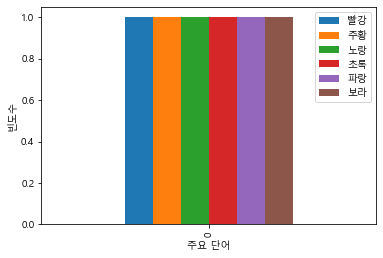

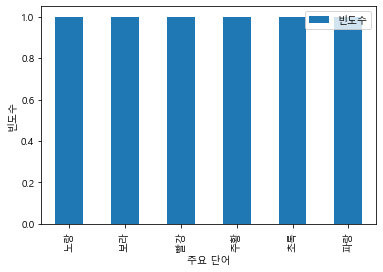

In [8]:
#! /usr/bin/python3.4 # -*- coding: utf-8 -*
from collections import Counter
import random 
import webbrowser 
from konlpy.tag import Twitter 
import pytagcloud # requires Korean font support 
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib import font_manager, rc
bill_num = 'color'#파일명영어로
fname='%s.txt'%bill_num
filename=bill_num+'6.jpg'
with open(fname, "r", encoding="utf-8") as fobj:#텍스트파일읽어오기   
    text=fobj.read()         
h = Twitter() 
nouns = h.nouns(text) 
count = Counter(nouns)
wordInfo={}
for tags, counts in count.most_common(50):  
    if(len(str(tags))>1):      
        wordInfo[tags]=counts      
        print("%s:%d"%(tags, counts))
font_location='c:/windows/fonts/malgun.ttf'
font_name=font_manager.FontProperties(fname=font_location).get_name()
rc('font', family=font_name) 
dfdata=pd.DataFrame(wordInfo, index=[0]) 
dfdata.plot(kind='bar') 
plt.xlabel('주요 단어')
plt.ylabel('빈도수') 
plt.show() 
wordInfo2={'빈도수':wordInfo}
dfdata2=pd.DataFrame(wordInfo2) 
dfdata2.plot(kind='bar')
plt.xlabel('주요 단어') 
plt.ylabel('빈도수')
plt.show() 
taglist=pytagcloud.make_tags(dict(wordInfo).items(), maxsize=80)
pytagcloud.create_tag_image(taglist, filename, fontname='korean', size=(640, 480), rectangular=True) #webbrowser.open(filename)